# Assignment 1

# K-Nearest Method

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [3]:
dataset=pd.read_csv('train.csv')

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.drop(['Name','Cabin','Ticket'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27.0,0,0,13.0000,S
885,888,1,1,female,19.0,0,0,30.0000,S
886,889,0,3,female,45.0,1,2,23.4500,S
887,890,1,1,male,26.0,0,0,30.0000,C


In [6]:
lab_enc=preprocessing.LabelEncoder()

In [7]:
dataset['Sex']=lab_enc.fit_transform(dataset['Sex'])
dataset['Embarked']=lab_enc.fit_transform(dataset['Embarked'])

In [8]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
885,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,45.0,1,2,W./C. 6607,23.4500,NaN,2
887,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [9]:
y=dataset['Pclass']

In [10]:
X=dataset.drop(['Pclass','PassengerId','Name','Ticket','Cabin'],axis=1)

In [11]:
X.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
x_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
350,0,1,45.0,0,0,35.0000,2
124,1,1,12.0,1,0,11.2417,0
577,0,0,45.0,1,0,14.4583,0
422,0,0,28.0,1,1,14.4000,2
118,0,0,2.0,4,2,31.2750,2


In [14]:
x_test.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,0,14.0,0,0,7.8542,2
158,0,1,45.0,8,2,69.5500,2
762,1,0,36.0,1,2,120.0000,2
740,0,1,36.0,1,0,78.8500,2
482,1,0,63.0,0,0,9.5875,2


In [15]:
accuracy=[]

In [16]:
k=[i for i in range(1,268)]

In [17]:
def knn(i):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf=knn.fit(x_train,y_train).score(x_test,y_test)
    y_pred=knn.predict(x_test)
    accuracy_score(y_test,y_pred,normalize=True)
    accuracy.append(clf)

In [18]:
for i in range(1,268):
    knn(i)

In [19]:
maxi=max(accuracy)
maxi

0.8913857677902621

In [20]:
k[accuracy.index(maxi)]

1

# Scatter Plot

In [21]:
plot=pd.DataFrame({'k':np.array(k),'Accuracy':np.array(accuracy)})

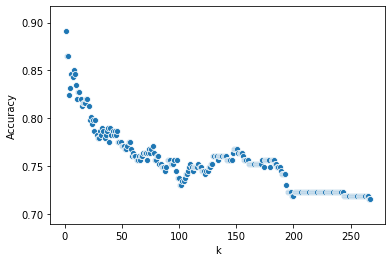

In [22]:
sns.scatterplot(plot.k,plot.Accuracy)

# Support Vector Machine(SVM)

In [23]:
dataset=pd.read_csv('Train.csv')

In [24]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
le=preprocessing.LabelEncoder()

In [26]:
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])

In [27]:
dataset.drop(['Cabin','Ticket','Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
884,887,0,2,1,27.0,0,0,13.0000,2
885,888,1,1,0,19.0,0,0,30.0000,2
886,889,0,3,0,45.0,1,2,23.4500,2
887,890,1,1,1,26.0,0,0,30.0000,0


# Pclass VS Remaining IDV

In [28]:
y=dataset['Pclass']
X=dataset.drop(['Pclass','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred,normalize=True)

0.9026217228464419

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 64,   4,   2],
       [  4,  36,   9],
       [  1,   6, 141]], dtype=int64)

# Survived VS Remaining IDV

In [31]:
y=dataset['Survived']
X=dataset.drop(['Survived','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred,normalize=True)

0.7415730337078652

In [33]:
confusion_matrix(y_test,y_pred)

array([[124,  33],
       [ 36,  74]], dtype=int64)

# Gender VS Remaining IDV

In [34]:
y=dataset['Sex']
X=dataset.drop(['Sex','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred,normalize=True)

0.7265917602996255

In [36]:
confusion_matrix(y_test,y_pred)

array([[ 66,  32],
       [ 41, 128]], dtype=int64)

# Embarked VS Remaining IDV

In [37]:
y=dataset['Embarked']
X=dataset.drop(['Embarked','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred,normalize=True)

0.7677902621722846

In [39]:
confusion_matrix(y_test,y_pred)

array([[ 23,   2,  24],
       [  0,   8,  14],
       [ 18,   4, 174]], dtype=int64)

# Parch VS Remaining IDV

In [40]:
y=dataset['Parch']
X=dataset.drop(['Parch','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred,normalize=True)

0.797752808988764

In [42]:
confusion_matrix(y_test,y_pred)

array([[187,   6,   5,   0,   0,   0],
       [ 21,  15,   3,   0,   0,   1],
       [ 10,   6,  11,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

# SibSp VS Remaining IDV

In [43]:
y=dataset['Sex']
X=dataset.drop(['Sex','PassengerId','Cabin','Ticket','Name'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(gamma=0.01,C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred,normalize=True)

0.7265917602996255

In [45]:
confusion_matrix(y_test,y_pred)

array([[ 66,  32],
       [ 41, 128]], dtype=int64)

from avove table we can conclude that Pclass Vs Remaining IDV have maximum accuracy score